# MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

from sklearn.metrics import roc_curve, auc, roc_auc_score


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
directorio = r"C:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\ML_LEAD SCORING\01_src\01_data_sample\TRABAJO"

Nombres de los ficheros de datos.

In [5]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'


Cargar los datos.

In [6]:
# Crear la ruta correctamente
ruta_x= os.path.join(directorio, nombre_x)
ruta_y= os.path.join(directorio, nombre_y)


# Cargar el archivo pickle
x = pd.read_pickle(ruta_x)
y = pd.read_pickle(ruta_y)

print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [7]:
x

,tiempo_en_site_mms,score_actividad_mms,ult_actividad_SMS Sent,visitas_total_mms,paginas_vistas_mms,score_perfil_mms,ocupacion_Working Professional,ambito_Select,ult_actividad_Chat Conversation,ult_actividad_Converted to Lead,ocupacion_Unemployed,ult_actividad_Page Visited on Website,origen_Lead Add Form,fuente_Direct Traffic
id,,,,,,,,,,,,,,
660737,0.00,0.70,0.00,0.00,0.00,0.44,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
660728,0.30,0.70,0.00,0.10,0.12,0.44,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
660727,0.68,0.60,0.00,0.04,0.10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
660719,0.14,0.50,0.00,0.02,0.05,0.67,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
660681,0.63,0.70,0.00,0.04,0.05,0.78,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579622,0.63,0.60,1.00,0.26,0.13,0.56,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
579615,0.09,0.60,1.00,0.10,0.12,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
579564,0.82,0.70,0.00,0.16,0.13,0.67,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


## MODELIZAR

### Reservar el dataset de validacion

In [8]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [9]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

In [10]:
grid = [{'algoritmo': [RandomForestRegressor()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]}
         
        ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [11]:
# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=grid,
    scoring='roc_auc',  
    cv=5,  # Validación cruzada con 5 folds
    verbose=0,
    n_jobs=-1  # Usa todos los núcleos disponibles
)


In [12]:

 modelo = grid_search.fit(train_x,train_y)

 pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

C:\Users\Viajes Elkano\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.43,0.09,0.15,0.14,RandomForestRegressor(),5,50,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.75,0.25,0.01,0.00,RandomForestRegressor(),5,100,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.04,0.14,0.00,0.00,RandomForestRegressor(),5,200,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.32,0.09,0.00,0.00,RandomForestRegressor(),10,50,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.07,0.32,0.00,0.00,RandomForestRegressor(),10,100,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,1.72,0.21,0.00,0.00,RandomForestRegressor(),10,200,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,1.06,0.26,0.00,0.00,RandomForestRegressor(),15,50,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,1.28,0.22,0.00,0.00,RandomForestRegressor(),15,100,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,1.82,0.12,0.00,0.00,RandomForestRegressor(),15,200,-1,"{'algoritmo': RandomForestRegressor(), 'algori...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


## EVALUAR

### Predecir sobre validación

In [13]:
pred = modelo.best_estimator_.predict(val_x)

### Evaluar sobre validación

In [14]:
roc_auc_score(val_y, pred)

np.float64(0.8844085362532005)

### Examinar el mejor modelo

In [15]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 RandomForestRegressor(max_depth=5, n_estimators=50,
                                       n_jobs=-1))])

## REPORTING DEL MODELO

### ROC Chart

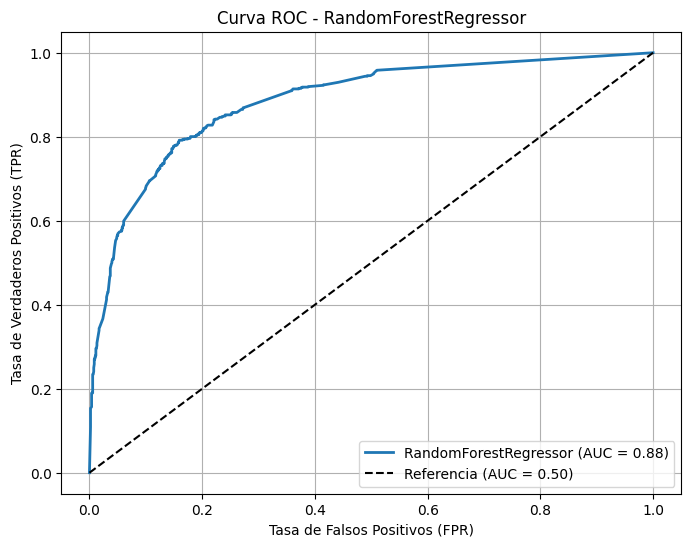

ROC AUC Score: 0.8844


In [16]:
# Obtener predicciones del modelo (valores continuos)
predicciones_continuas = modelo.best_estimator_.predict(val_x)

# Convertir valores continuos a etiquetas binarias usando un umbral (mediana como referencia)
umbral = np.median(predicciones_continuas)
predicciones_binarias = (predicciones_continuas >= umbral).astype(int)

# Calcular métricas ROC
fpr, tpr, _ = roc_curve(val_y, predicciones_continuas)  # Usamos las predicciones continuas
roc_auc = auc(fpr, tpr)

# Crear la gráfica ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'RandomForestRegressor (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Referencia (AUC = 0.50)')  # Línea de referencia

# Configurar etiquetas y título
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - RandomForestRegressor')
plt.legend(loc='lower right')
plt.grid()

# Mostrar la gráfica
plt.show()

# Imprimir el AUC
print(f'ROC AUC Score: {roc_auc:.4f}')
